# RSI - Strategy - Backtesting 

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')
# from backtesting._plotting import set_bokeh_output
# set_bokeh_output(notebook=False)
from backtesting import set_bokeh_output
set_bokeh_output(notebook=False)

/home/zuongthao/PycharmProjects/algo-stock/venv/lib/python3.11/site-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
data = data[data.index > '2020-11-01 00:00:00']

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627


In [6]:
def get_signal(r):
    signal = ''
    if r['RSI_s1'] < 30 and r['RSI'] > 31:
        signal = 'long'
    elif r['RSI_s1'] > 70 and r['RSI'] < 69:
        signal = 'short'
    return signal

In [7]:
def prepare_data(data):
    data['max_in_range'] = data['High'].rolling(10).max()
    data['min_in_range'] = data['Low'].rolling(10).min()
    data['RSI'] = ta.rsi(data["Close"], length=14)
    data['RSI_s1'] = data['RSI'].shift(1)
    data['signal'] = data.apply(lambda r: get_signal(r), axis=1)
    return data

In [8]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

In [9]:
prepared_data

,Open,High,Low,Close,Volume,max_in_range,min_in_range,RSI,RSI_s1,signal
Date,,,,,,,,,,
2020-11-02 10:15:00,899.6,901.5,899.6,901.2,2305,901.5,897.7,61.004215,50.983431,
2020-11-02 10:20:00,901.1,901.2,899.3,899.3,1796,901.5,897.7,47.701558,61.004215,
2020-11-02 10:25:00,899.1,900.3,898.8,899.9,1917,901.5,897.7,51.312174,47.701558,
2020-11-02 10:30:00,900.0,900.1,899.3,900.0,1150,901.5,897.7,51.908107,51.312174,
2020-11-02 10:35:00,899.6,900.4,899.1,899.4,1106,901.5,898.1,48.103661,51.908107,
...,...,...,...,...,...,...,...,...,...,...
2024-11-25 14:25:00,1298.0,1298.3,1296.7,1297.0,5524,1300.9,1295.6,48.873066,53.171490,
2024-11-25 14:30:00,1297.1,1297.1,1297.1,1297.1,161,1300.9,1295.9,49.314332,48.873066,
2024-11-25 14:45:00,1298.4,1298.4,1298.4,1298.4,5627,1300.9,1295.9,54.778494,49.314332,


In [10]:
prepared_data[prepared_data.signal != ''].tail(20)

,Open,High,Low,Close,Volume,max_in_range,min_in_range,RSI,RSI_s1,signal
Date,,,,,,,,,,
2024-11-12 13:25:00,1306.0,1307.8,1305.1,1307.4,7432,1315.6,1305.1,31.018488,23.625068,long
2024-11-12 13:45:00,1304.6,1307.6,1303.5,1307.1,7093,1310.7,1303.1,37.002090,27.202814,long
2024-11-14 14:25:00,1294.2,1295.7,1293.1,1295.0,11863,1303.2,1293.1,31.135666,27.262056,long
2024-11-15 10:00:00,1286.2,1287.7,1286.2,1287.7,2995,1289.6,1285.1,31.576831,23.335121,long
2024-11-15 11:25:00,1279.8,1281.6,1279.8,1281.4,4421,1285.0,1277.6,34.816127,25.862475,long
2024-11-18 09:35:00,1271.1,1272.3,1270.5,1272.2,3369,1280.0,1270.5,33.498695,29.509059,long
2024-11-18 09:50:00,1267.6,1269.0,1267.5,1269.0,4319,1275.6,1267.5,31.160976,26.595198,long
2024-11-18 10:50:00,1264.9,1266.9,1264.9,1266.6,4556,1271.8,1263.7,36.291064,29.697724,long
2024-11-18 13:05:00,1262.8,1264.6,1262.8,1264.2,3904,1267.6,1261.8,37.144304,29.150613,long


In [11]:
class MainStrategy(Strategy):
    max_sl = 3.1
    trailing_sl = 4.1
    tp_step = 19
    def init(self):
        super().init()

    def next(self):
        super().next()
        close_price = self.data.Close[-1]
        if self.position.is_long:
            max_in_range = self.data.max_in_range[-1]
            if close_price < max_in_range - self.trailing_sl:
                self.position.close()
        elif self.position.is_short:
            min_in_range = self.data.min_in_range[-1]
            if close_price > min_in_range + self.trailing_sl:
                self.position.close()
 
        signal = self.data.signal[-1]
        if self.position:
            if signal == 'long' and self.position.is_short:
                self.position.close()
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short' and self.position.is_long:
                sell_price = close_price
                self.position.close()
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)
        else:
            if signal == 'long':
                buy_price = close_price
                sl = buy_price - self.max_sl
                tp = buy_price + self.tp_step
                self.buy(size=1, sl=sl, tp=tp)
            elif signal == 'short':
                sell_price = close_price
                sl = sell_price + self.max_sl
                tp = sell_price - self.tp_step
                self.sell(size=1, sl=sl, tp=tp)

In [12]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [13]:
stats

Start                     2020-11-02 10:15:00
End                       2024-11-26 09:05:00
Duration                   1484 days 22:50:00
Exposure Time [%]                   21.112506
Equity Final [$]                   9622.75974
Equity Peak [$]                   10050.47923
Return [%]                          -3.772403
Buy & Hold Return [%]               44.052375
Return (Ann.) [%]                   -0.948317
Volatility (Ann.) [%]                0.763777
Sharpe Ratio                        -1.241615
Sortino Ratio                       -1.895573
Calmar Ratio                        -0.211352
Max. Drawdown [%]                   -4.486906
Avg. Drawdown [%]                   -0.243333
Max. Drawdown Duration     1357 days 20:00:00
Avg. Drawdown Duration       61 days 14:40:00
# Trades                                 1399
Win Rate [%]                        30.664761
Best Trade [%]                       2.015838
Worst Trade [%]                     -1.686866
Avg. Trade [%]                    

In [14]:
stats['_trades'].tail(20)

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
1379,1,51300,51301,1307.79222,1308.1,0.30778,0.000235,2024-11-12 13:30:00,2024-11-12 13:35:00,None,0 days 00:05:00
1380,1,51304,51309,1307.29207,1306.4,-0.89207,-0.000682,2024-11-12 13:50:00,2024-11-12 14:15:00,None,0 days 00:25:00
1381,1,51414,51415,1295.78862,1292.9,-2.88862,-0.002229,2024-11-14 14:30:00,2024-11-14 14:45:00,None,0 days 00:15:00
1382,1,51429,51434,1287.98628,1284.6,-3.38628,-0.002629,2024-11-15 10:05:00,2024-11-15 10:30:00,None,0 days 00:25:00
1383,1,51446,51461,1282.18454,1280.8,-1.38454,-0.001080,2024-11-15 11:30:00,2024-11-15 14:10:00,None,0 days 02:40:00
1384,1,51475,51476,1272.48163,1270.0,-2.48163,-0.001950,2024-11-18 09:40:00,2024-11-18 09:45:00,None,0 days 00:05:00
1385,1,51478,51479,1269.28067,1270.2,0.91933,0.000724,2024-11-18 09:55:00,2024-11-18 10:00:00,None,0 days 00:05:00
1386,1,51490,51491,1267.18004,1267.2,0.01996,0.000016,2024-11-18 10:55:00,2024-11-18 11:00:00,None,0 days 00:05:00
1387,1,51500,51501,1264.57926,1263.3,-1.27926,-0.001012,2024-11-18 13:10:00,2024-11-18 13:15:00,None,0 days 00:05:00
1388,-1,51516,51517,1274.61750,1273.2,1.41750,0.001112,2024-11-18 14:30:00,2024-11-18 14:45:00,None,0 days 00:15:00


In [15]:
stats['_trades']['PnL'].min()

-21.48192999999992

In [16]:
trades = stats['_trades']

In [17]:
trades[trades.PnL < -3.1]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Tag,Duration
1,-1,113,129,913.12598,916.4,-3.27402,-0.003586,2020-11-04 11:10:00,2020-11-04 13:55:00,None,0 days 02:45:00
2,1,213,217,909.97291,906.4,-3.57291,-0.003926,2020-11-06 11:00:00,2020-11-06 11:20:00,None,0 days 00:20:00
3,1,222,225,907.07204,903.5,-3.57204,-0.003938,2020-11-06 13:10:00,2020-11-06 13:25:00,None,0 days 00:15:00
4,-1,258,286,917.42469,920.8,-3.37531,-0.003679,2020-11-09 10:30:00,2020-11-09 14:15:00,None,0 days 03:45:00
6,1,352,371,921.27630,918.1,-3.17630,-0.003448,2020-11-11 09:50:00,2020-11-11 11:25:00,None,0 days 01:35:00
...,...,...,...,...,...,...,...,...,...,...,...
1371,-1,51070,51091,1326.70187,1330.2,-3.49813,-0.002637,2024-11-06 09:55:00,2024-11-06 13:05:00,None,0 days 03:10:00
1374,1,51195,51203,1328.19834,1324.7,-3.49834,-0.002634,2024-11-08 13:15:00,2024-11-08 13:55:00,None,0 days 00:40:00
1377,1,51241,51248,1311.59336,1308.2,-3.39336,-0.002587,2024-11-11 11:25:00,2024-11-11 13:25:00,None,0 days 02:00:00
1382,1,51429,51434,1287.98628,1284.6,-3.38628,-0.002629,2024-11-15 10:05:00,2024-11-15 10:30:00,None,0 days 00:25:00


In [18]:
trades[trades.PnL < -3.1]['PnL'].sum()

-1184.5948499999663

In [19]:
len(trades[trades.PnL < -3.1]) * -3.1

-988.9

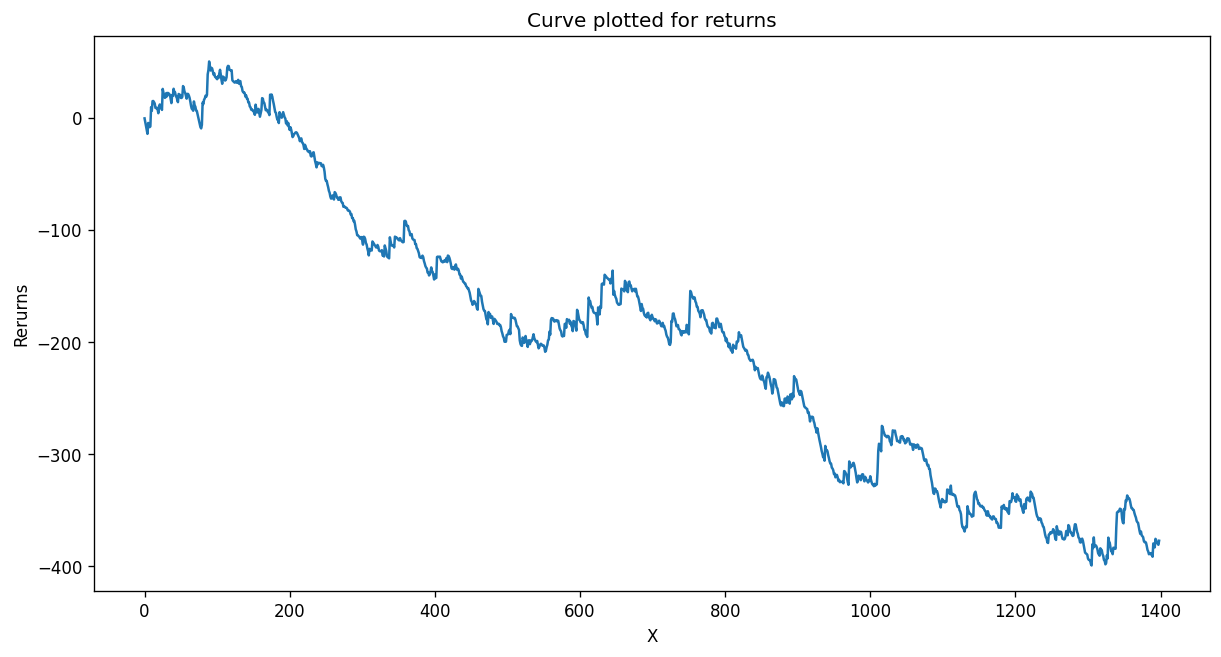

In [20]:
copy_trades = trades.copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()

## Optimize

In [21]:
max_sl_params = [x / 10.0 for x in range(20, 50, 2)]
trailing_sl_params = [x / 10.0 for x in range(30, 100, 5)]
tp_step_params = [x for x in range(10, 30)]

In [22]:
trailing_sl_params

[3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5]

In [23]:
optimize_stats, optimize_table = bt.optimize(
                                      trailing_sl=trailing_sl_params,
                                      tp_step=tp_step_params,
                    maximize='Return [%]', 
                    random_state=0,
                    return_heatmap=True)

In [24]:
optimize_stats

Start                     2020-11-06 14:10:00
End                       2024-11-26 09:05:00
Duration                   1480 days 18:55:00
Exposure Time [%]                   52.833666
Equity Final [$]                   9839.84182
Equity Peak [$]                   10041.80271
Return [%]                          -1.601582
Buy & Hold Return [%]               42.502744
Return (Ann.) [%]                   -0.405612
Volatility (Ann.) [%]                 1.52549
Sharpe Ratio                         -0.26589
Sortino Ratio                       -0.382704
Calmar Ratio                        -0.106204
Max. Drawdown [%]                   -3.819175
Avg. Drawdown [%]                    -0.21304
Max. Drawdown Duration     1433 days 19:50:00
Avg. Drawdown Duration       64 days 08:07:00
# Trades                                 2307
Win Rate [%]                        31.209363
Best Trade [%]                       3.198112
Worst Trade [%]                      -1.65552
Avg. Trade [%]                    

In [25]:
optimize_table

trailing_sl  tp_step
3.0          10        -14.255848
             11        -13.933477
             12        -13.710826
             13        -13.704226
             14        -13.539226
                          ...    
9.5          25         -3.654004
             26         -3.243244
             27         -3.326353
             28         -2.921338
             29         -2.713230
Name: Return [%], Length: 280, dtype: float64

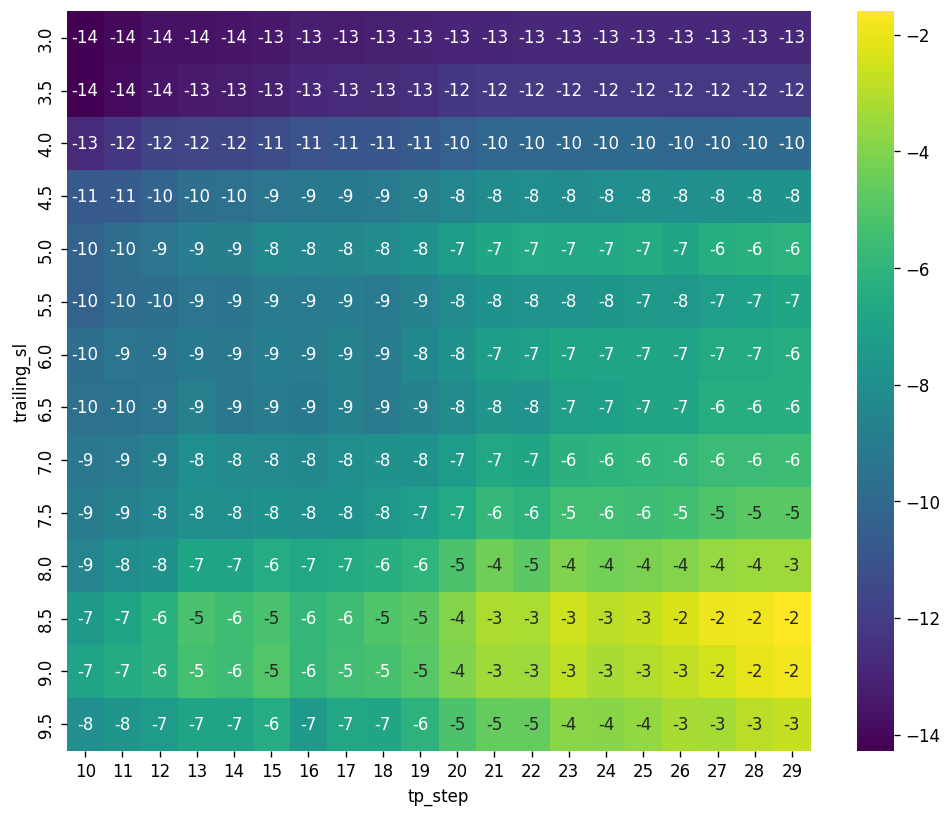

In [26]:
import seaborn as sns
# Convert multiindex series to dataframe
heatmap_df = optimize_table.unstack()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, cmap='viridis', fmt='.0f')
plt.show()